In [1]:
import numpy

from matplotlib import pyplot

import custom_environments

In [2]:
e = custom_environments.VectorDiscreteSteps(num_envs=3, render_mode="rgb_array")

In [3]:
e.action_space

MultiDiscrete([13 13 13])

In [4]:
e.single_action_space

Discrete(13)

In [5]:
e.reset()

(array([[-0.08992958, -0.21143006,  0.        ,  0.        ],
        [-0.72689134, -0.7793163 ,  0.        ,  0.        ],
        [-0.23406926,  0.04577566,  0.        ,  0.        ]],
       dtype=float32),
 {})

In [6]:
def show(image):
    _, ax = pyplot.subplots(figsize=(14, 14))
    ax.axis("off")
    ax.imshow(image)
    pyplot.tight_layout()

In [7]:
show(e.render())

In [8]:
action = e.action_space.sample()
print(action)

[4 8 9]


In [9]:
e.step(action)

(array([[-0.21492958, -0.3898191 , -0.0625    , -0.08919452],
        [-0.60189134, -0.6689211 ,  0.0625    ,  0.0551976 ],
        [ 0.01593075,  0.5396734 ,  0.125     ,  0.24694885]],
       dtype=float32),
 array([-1.01481915, -1.29392111, -0.71032661]),
 array([False, False, False]),
 array([False, False, False]),
 {})

In [10]:
show(e.render())

In [11]:
e._state

array([[9.828932 , 6.962676 ],
       [9.025044 , 5.9952717],
       [8.622282 , 7.539827 ]], dtype=float32)

In [12]:
def cross_target(left, stop, right):
    assert e._state is not None

    high_start = e._state[:, 1] > e._state[:, 0]

    keep_moving = numpy.full(high_start.shape, True)

    while any(keep_moving):
        actions = numpy.full(high_start.shape, right)
        actions[high_start] = left
        actions[numpy.logical_not(keep_moving)] = stop

        e.step(actions)
        show(e.render())

        keep_moving = high_start == (e._state[:, 1] > e._state[:, 0])

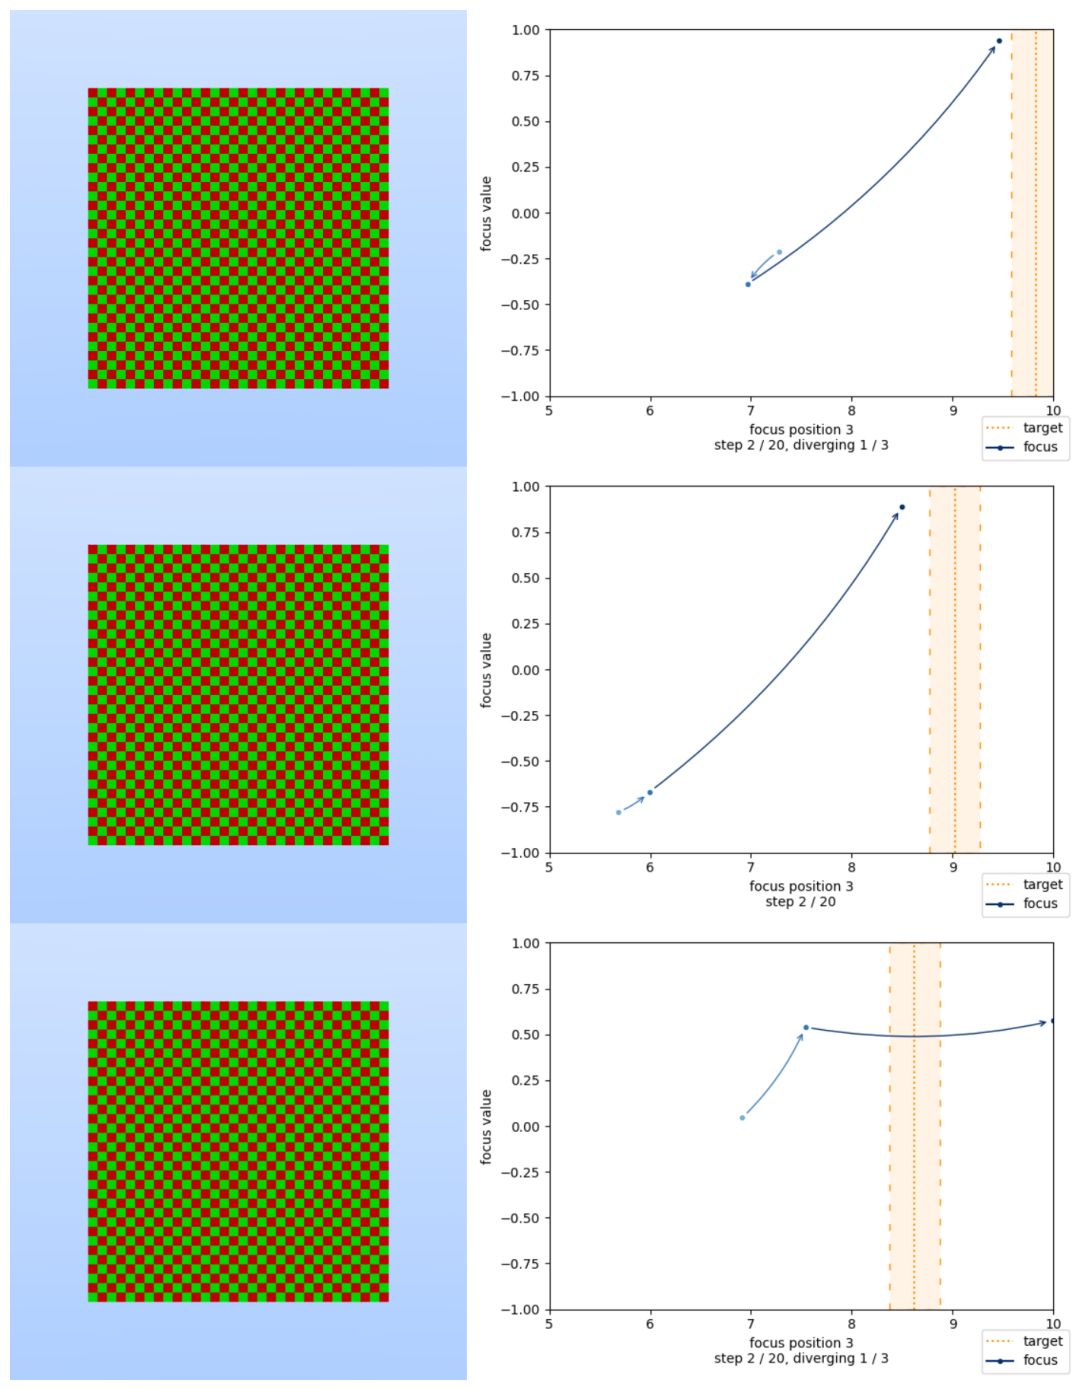

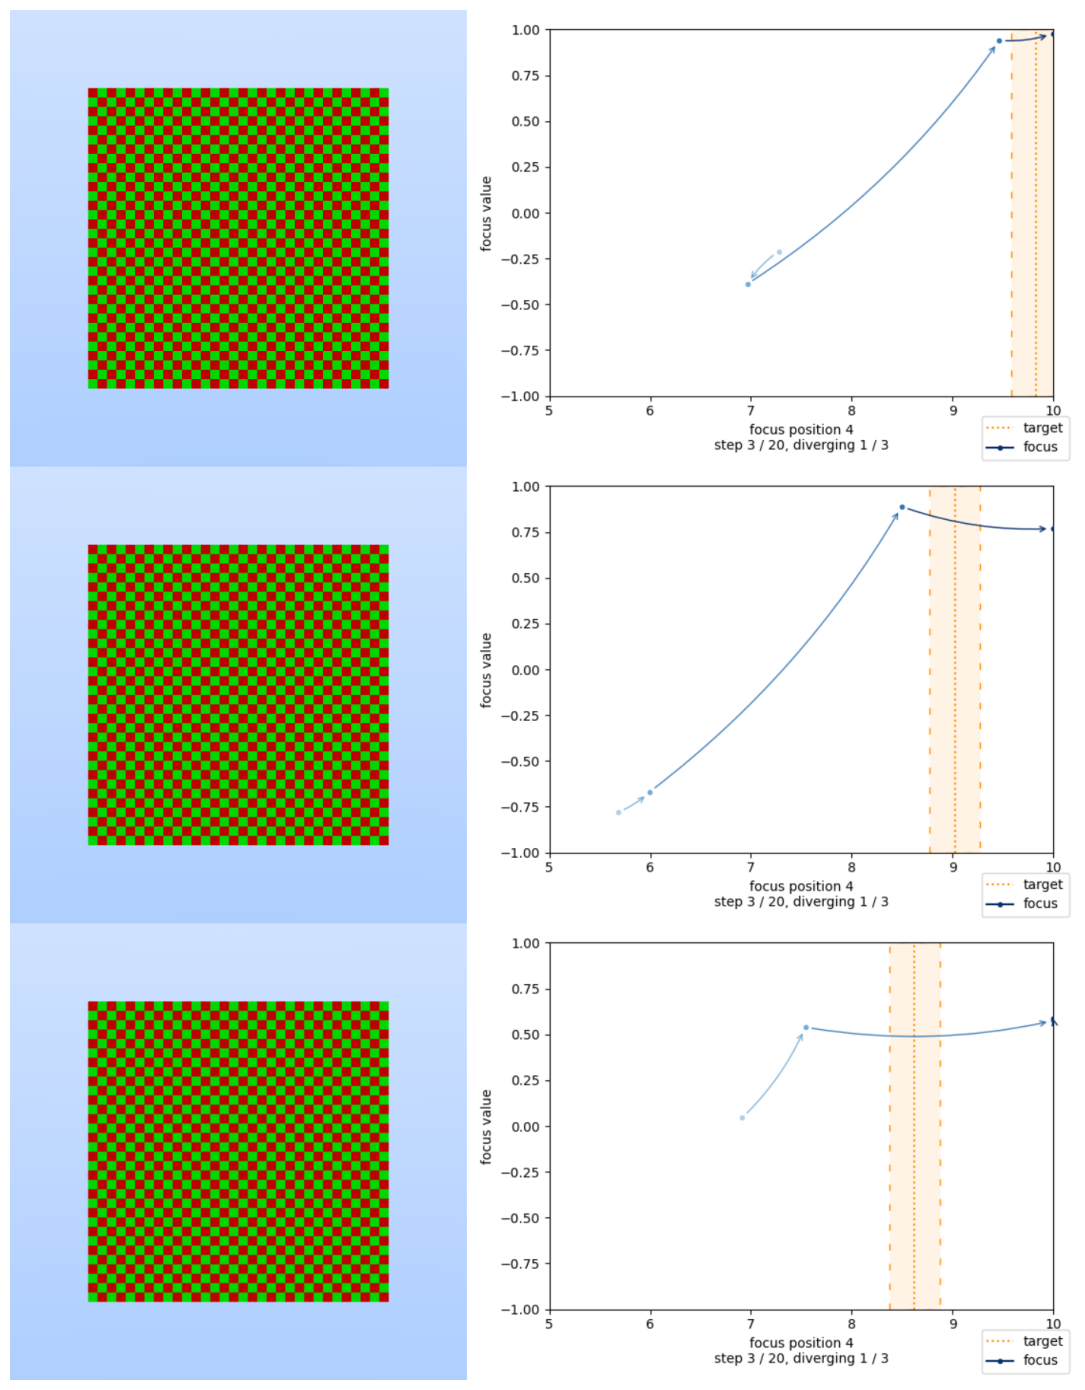

In [13]:
cross_target(1, 6, 11)

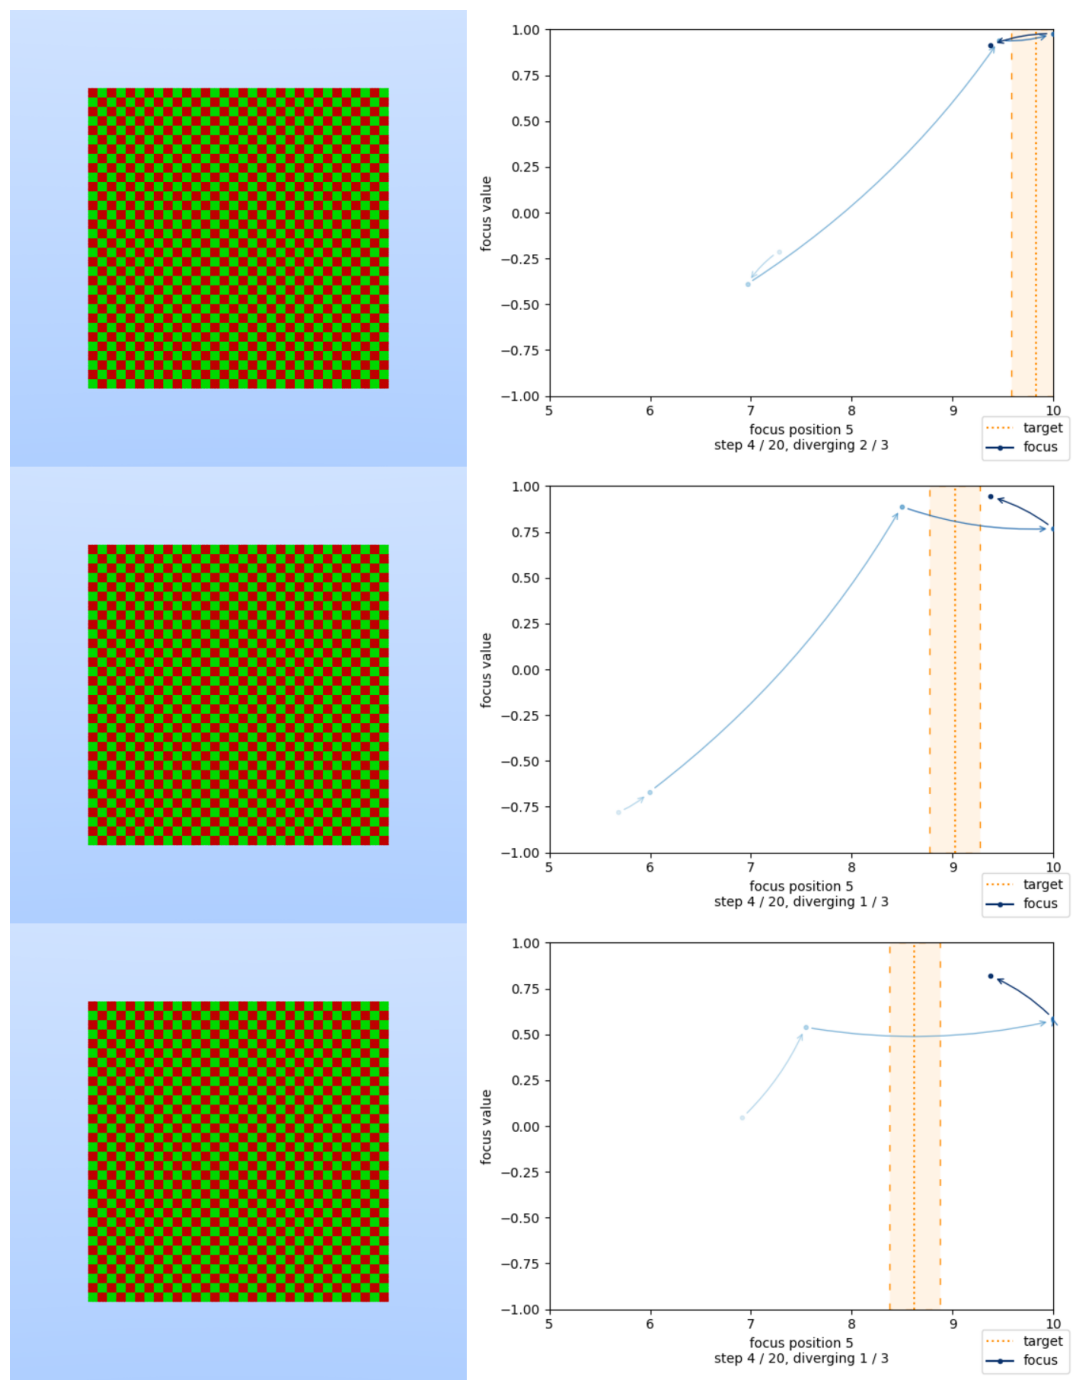

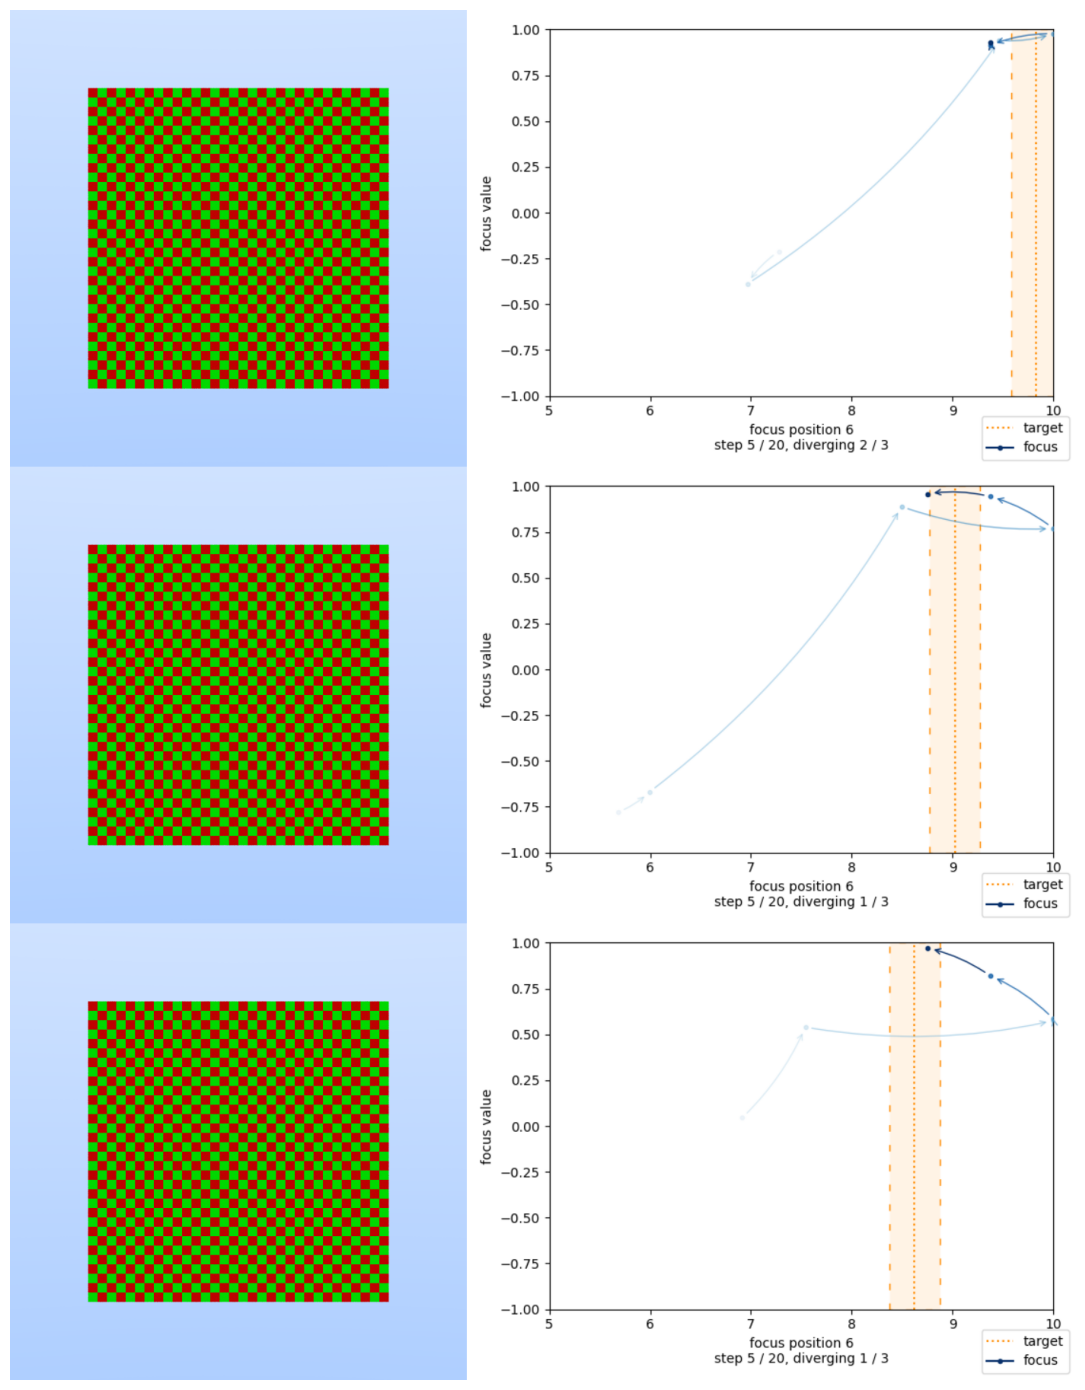

In [14]:
cross_target(3, 6, 9)

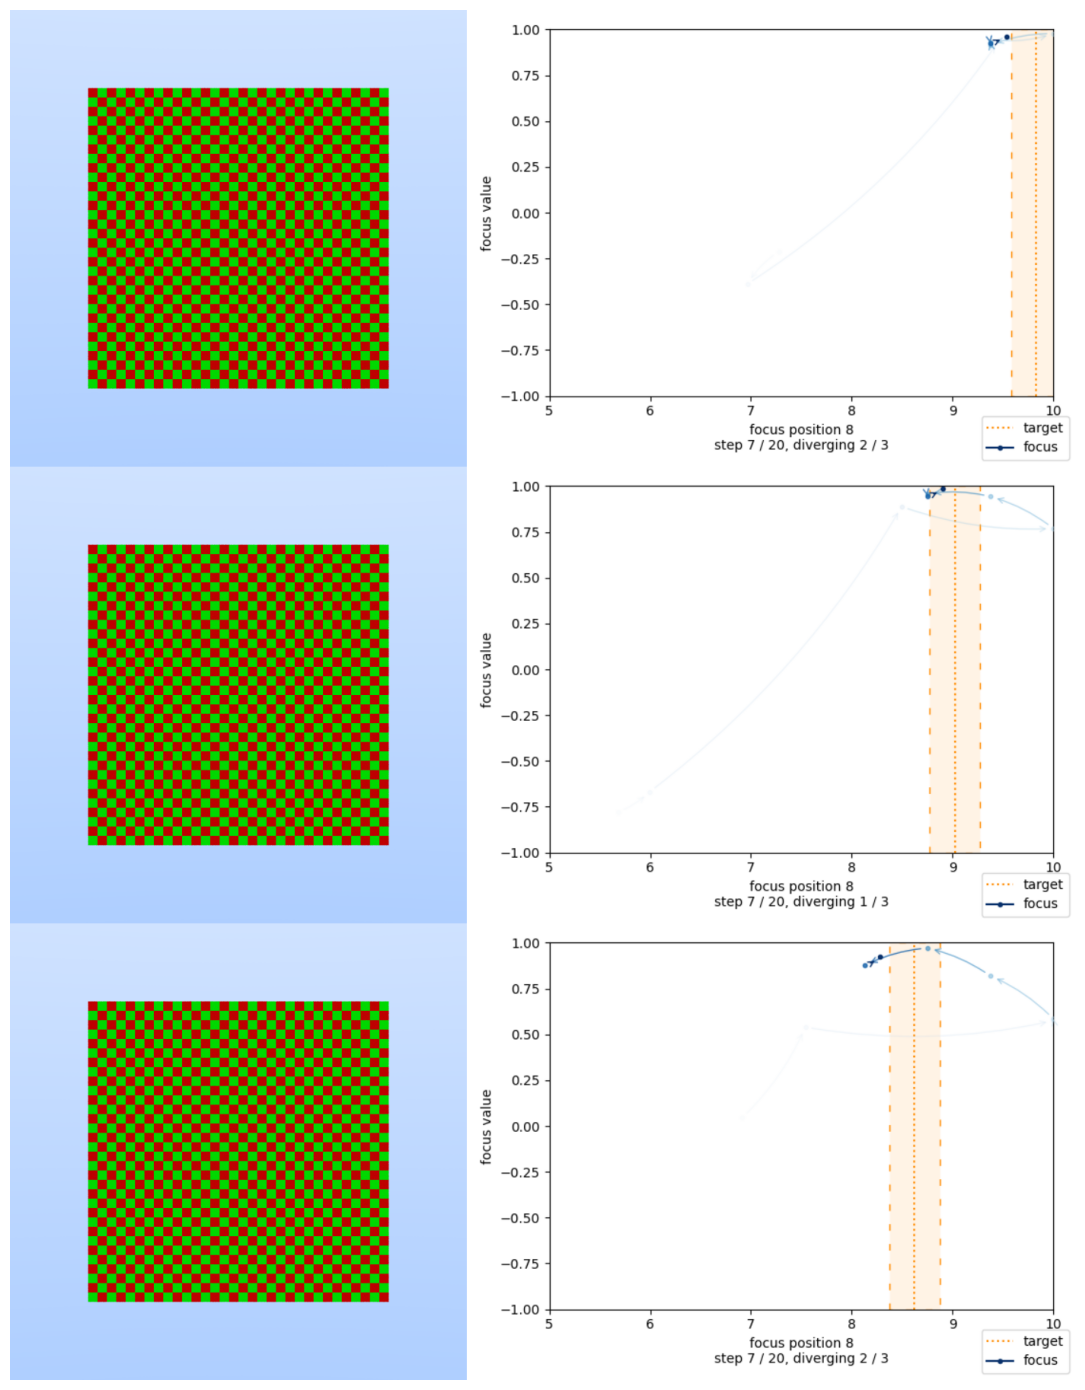

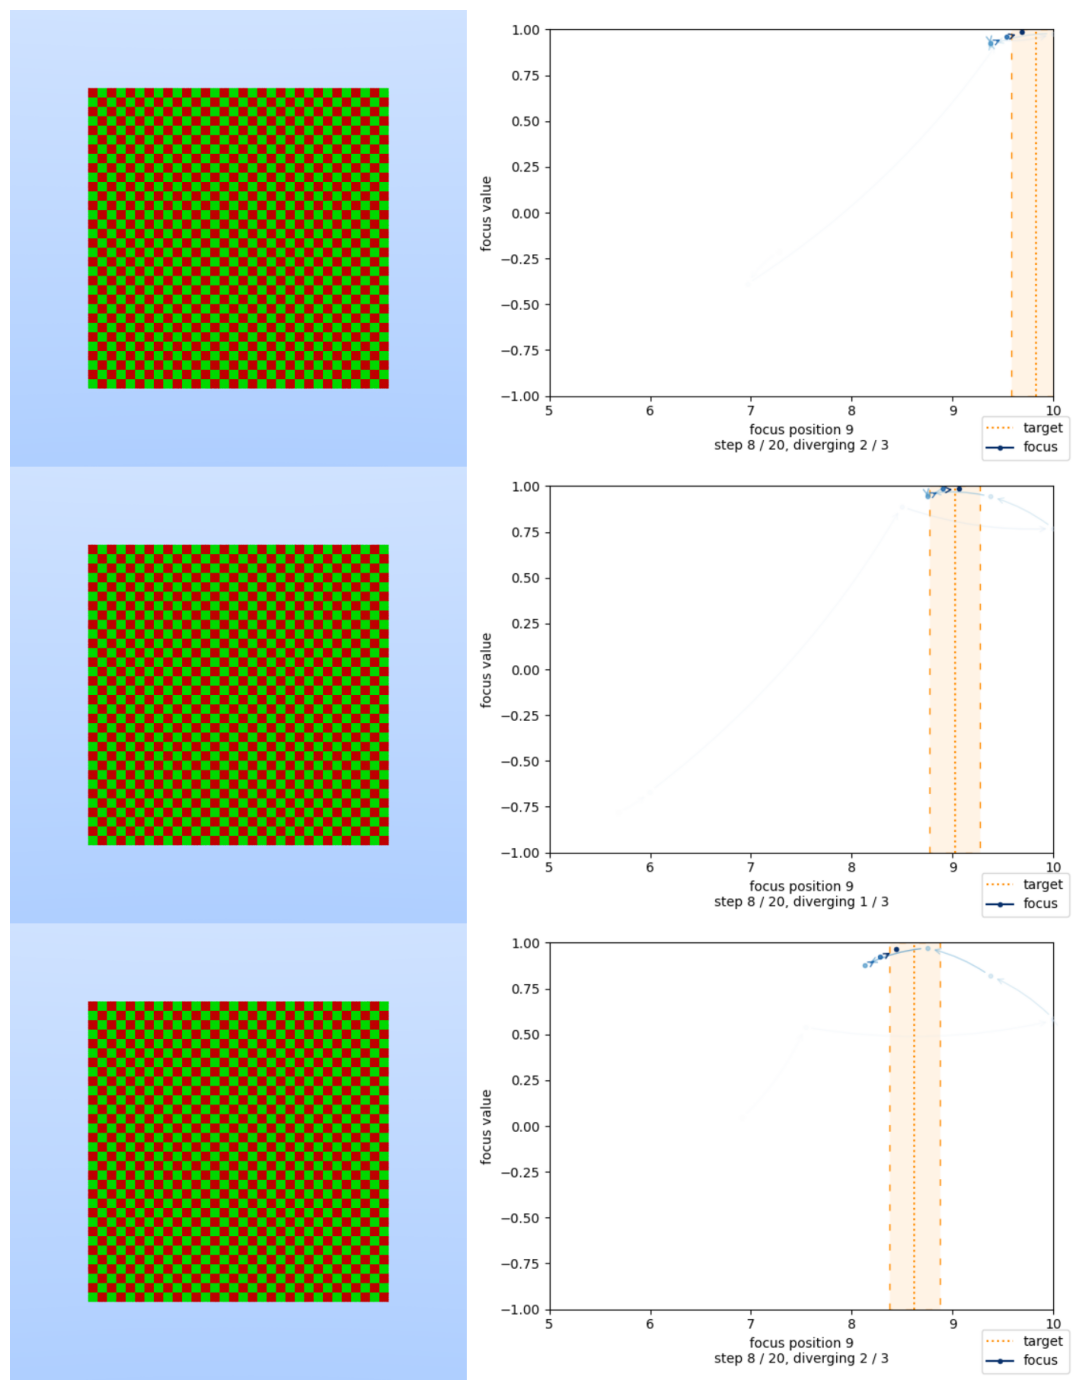

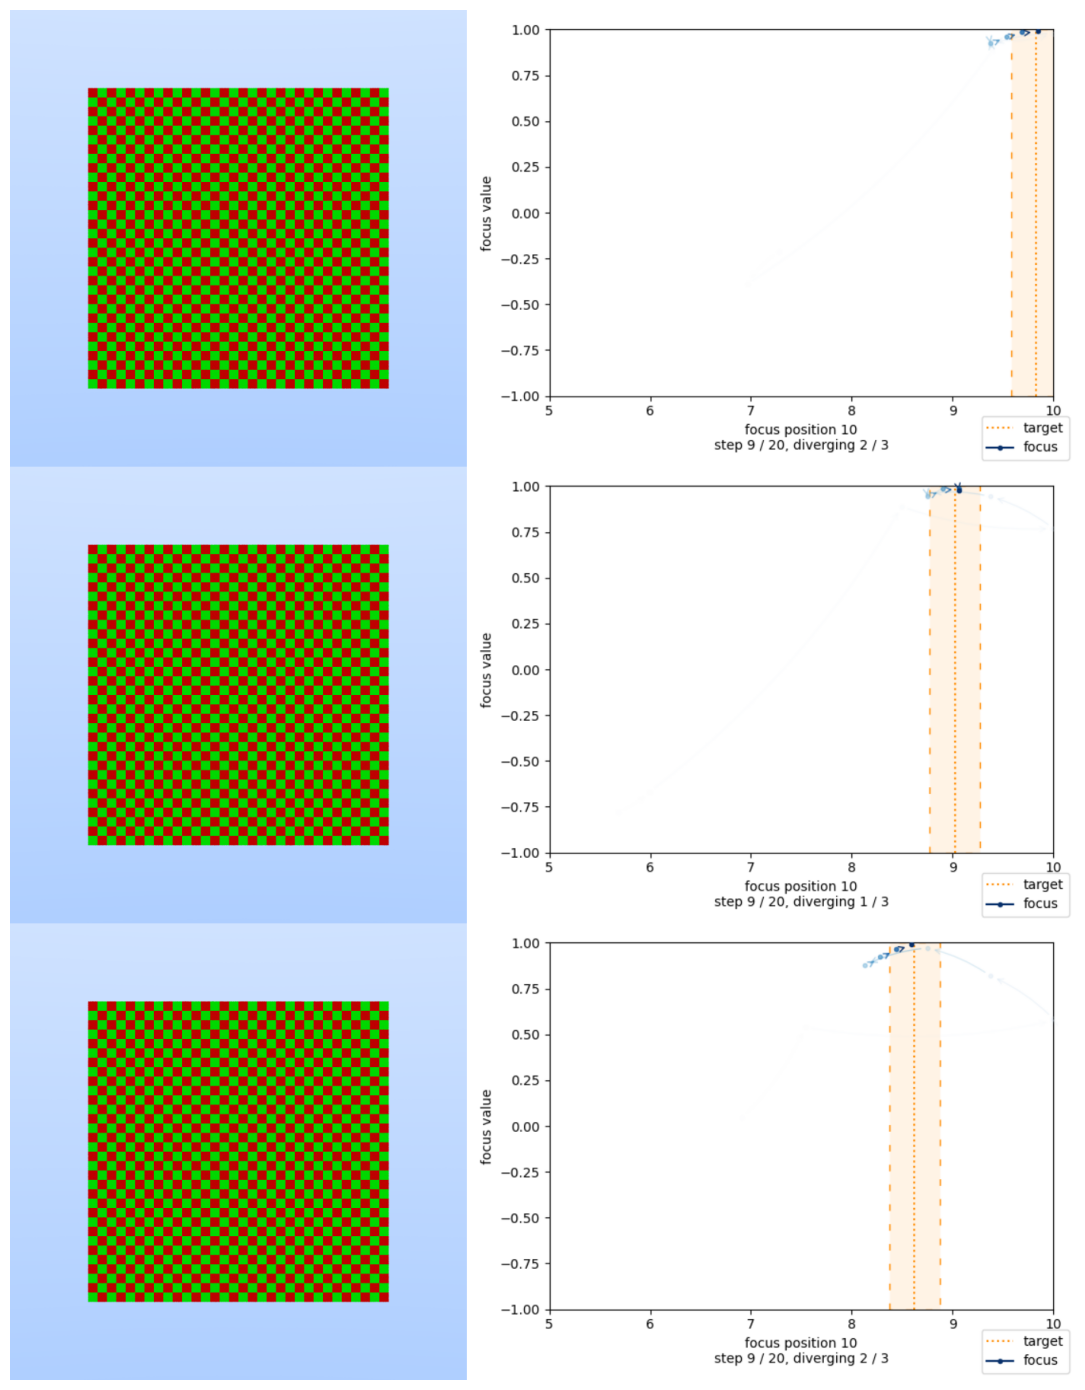

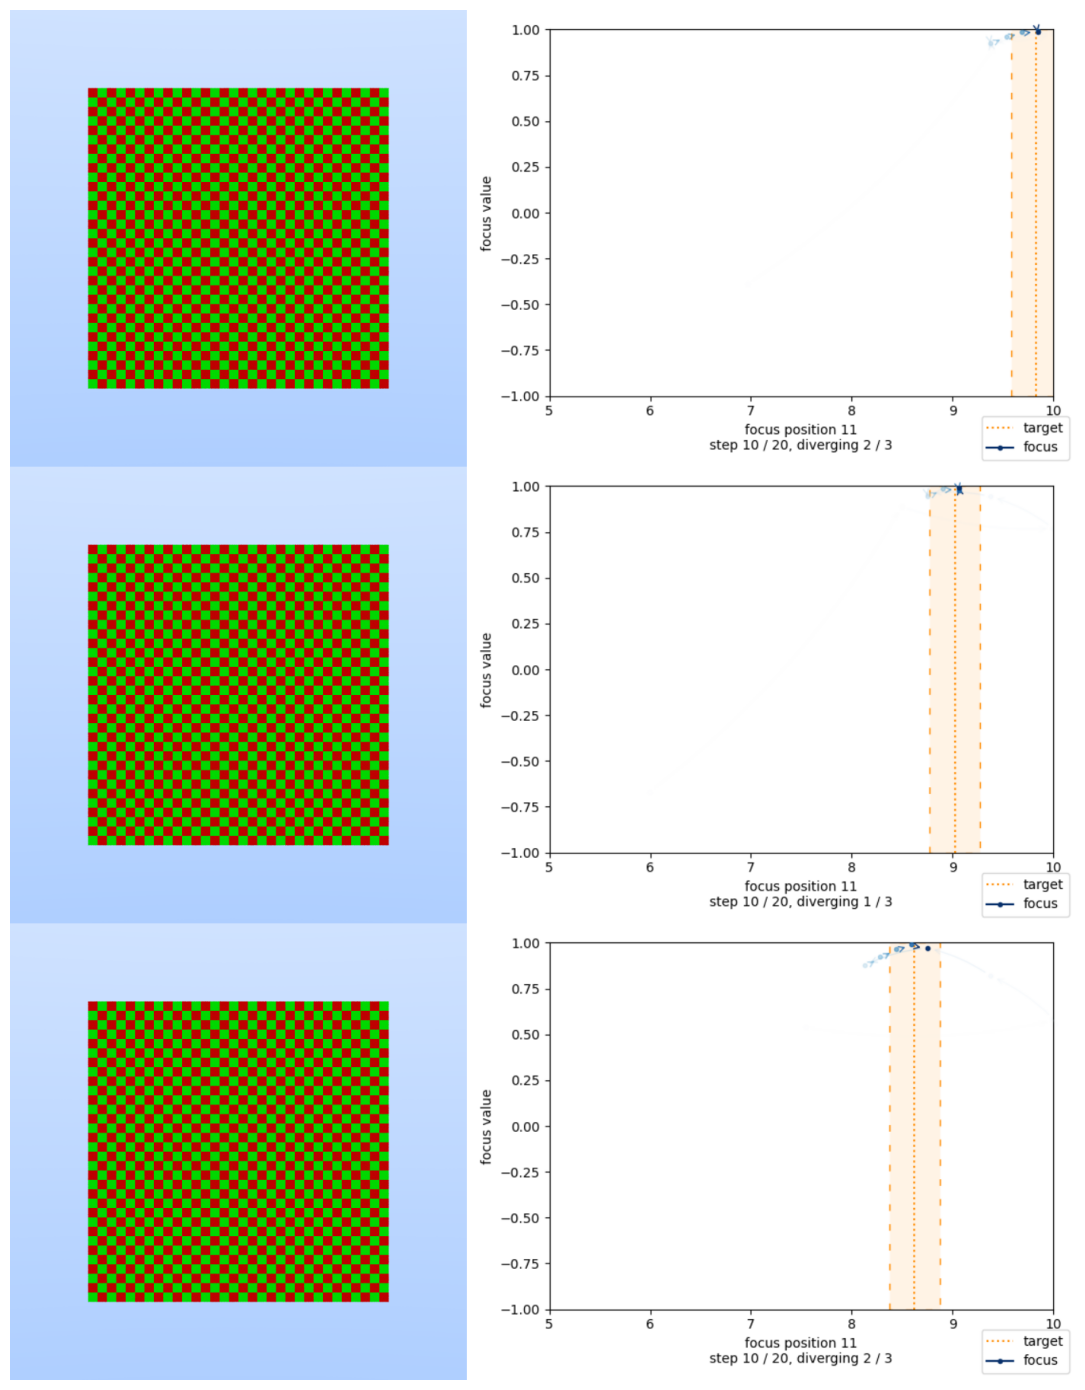

In [15]:
cross_target(5, 6, 7)